<a href="https://colab.research.google.com/github/steveding1/DA-learning/blob/master/Alltrails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import re

In [20]:
with open('banff.html','r') as f:
  html = f.read()
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
#url
soup.find_all('a', class_="MAeU7STjXOwFXsjoI5meHg== E8W6wpmnshxeFElAofUjoA==")[0].get('href')
#Trail_location
soup.find_all('a', class_="FeN09tTLRWzcvnAx7iliJw== YUdyXKFWY0YDKYzMi-qVJg==")[13].string
#Trail_Difficulty
soup.find_all('span', {"data-testid":re.compile("_Difficulty$")})
#Rating
soup.find_all('span', class_="lwzqbqErqDlQCv5VR6Cw5w==")[0]
#ReviewCount
soup.find_all('span', class_="C4Aa+9jSPShFuEehAasL9g==")
#Length: 7.4 km
soup.find_all(text=re.compile('Length: '))
#Est. 2h 49m
#for i in soup.find_all('div', {"data-testid":re.compile("_Stats$")}):
#  print(i.text.split('Est. ')[1])

In [ ]:
c = 0
for i in soup.find_all('div', {"data-testid":re.compile("_Stats$")}):
  if len(i.text.split('Est. ')) > 1:
    print(i.text.split('Est. '))
  c+=1
print(c)

In [22]:
#url
urls = [s.get('href') for s in soup.find_all('a', class_="MAeU7STjXOwFXsjoI5meHg== E8W6wpmnshxeFElAofUjoA==")]
#Trail_location
locations = [s.text for s in soup.find_all('a', class_="MAeU7STjXOwFXsjoI5meHg== E8W6wpmnshxeFElAofUjoA==")]
#Trail_Difficulty
difficulties = [s.text for s in soup.find_all('span', {"data-testid":re.compile("_Difficulty$")})]
#Rating
ratings = [float(s.text) for s in soup.find_all('span', class_="lwzqbqErqDlQCv5VR6Cw5w==")]
#ReviewCount
review_counts = [int(re.sub("[^0-9]", "", s.text)) for s in soup.find_all('span', class_="C4Aa+9jSPShFuEehAasL9g==")]
#Length: 7.4 km
lengths = [str(s.string).replace('Length: ', '').replace(' km', '') for s in soup.find_all(text=re.compile('Length: '))]
#Est. 2h 49m
est_time = [s.text.split('Est. ')[1] if len(s.text.split('Est. '))==2 else 'NA' for s in soup.find_all('div', {"data-testid":re.compile("_Stats$")})]

In [23]:
#est_time 2h 49m to minutes:
est_time1 = []
regexp = re.compile(r'\dm')
for e in est_time:
  if e == 'Multi-day':
    est_time1.append(9999)
  elif regexp.search(e):
    if 'h' in e:
      split = e.split('h ')
      hour = int(split[0])
      minutes = int(split[1].replace('m',''))
    else:
      minutes = int(e.replace('m',''))
    est_time1.append(hour * 60 + minutes)
  else:
    est_time1.append(None)

In [21]:
len(soup.find_all(text=re.compile('Length:')))

339

In [24]:
data = pd.DataFrame(
    {"urls": urls,
"locations": locations,
"difficulties": difficulties,
"ratings": ratings,
"reviews": review_counts,
"lengths": lengths,
"est_time(minutes)": est_time1})

In [25]:
data.lengths = data.lengths.astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   urls               339 non-null    object 
 1   locations          339 non-null    object 
 2   difficulties       339 non-null    object 
 3   ratings            339 non-null    float64
 4   reviews            339 non-null    int64  
 5   lengths            339 non-null    float64
 6   est_time(minutes)  324 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 18.7+ KB


In [26]:
data.isnull().sum()

urls                  0
locations             0
difficulties          0
ratings               0
reviews               0
lengths               0
est_time(minutes)    15
dtype: int64

In [27]:
data.difficulties.value_counts()

Hard        179
Moderate    108
Easy         52
Name: difficulties, dtype: int64

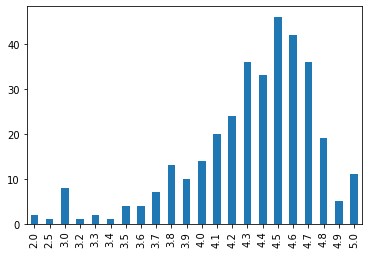

In [28]:
data.ratings.value_counts().sort_index().plot(kind='bar')

In [62]:
#trails > 50 km
data.lengths.sort_values()[-13:-3]

153    50.7
178    51.0
109    51.7
202    53.4
185    56.6
63     57.1
323    61.0
147    70.0
229    75.8
250    77.7
Name: lengths, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


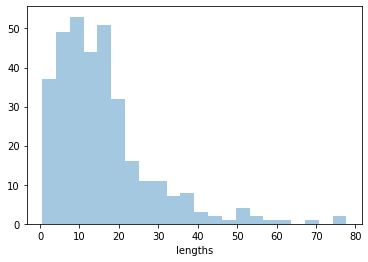

In [64]:
import seaborn as sn
sn.distplot(data.lengths.sort_values()[:-3],kde=False)
#most of trails less than 20km

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


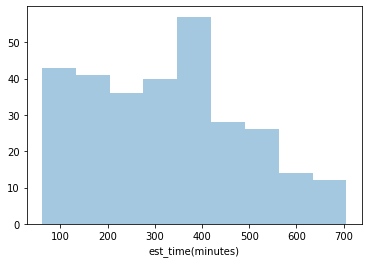

In [79]:
# time length distribution - there are a lot in around 6 hours.
sn.distplot(data[data['est_time(minutes)']!=9999]['est_time(minutes)'],kde=False)